In [2]:
import mne
mne.set_log_level('error')

import numpy as np
import matplotlib.pyplot as plt

In [3]:
raw = mne.io.read_raw_brainvision('data/sub-001/sub-001.vhdr')
raw.info

Measurement date,"January 20, 2015 13:15:58 GMT"
Experimenter,Unknown
Participant,Unknown
Digitized points,Not available
Good channels,16 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,500.00 Hz
Highpass,0.01 Hz
Lowpass,80.00 Hz


In [5]:
print(raw.info.keys())
print(raw.info['ch_names'])

dict_keys(['acq_pars', 'acq_stim', 'ctf_head_t', 'description', 'dev_ctf_t', 'dig', 'experimenter', 'utc_offset', 'device_info', 'file_id', 'highpass', 'hpi_subsystem', 'kit_system_id', 'helium_info', 'line_freq', 'lowpass', 'meas_date', 'meas_id', 'proj_id', 'proj_name', 'subject_info', 'xplotter_layout', 'gantry_angle', 'bads', 'chs', 'comps', 'events', 'hpi_meas', 'hpi_results', 'projs', 'proc_history', 'custom_ref_applied', 'sfreq', 'dev_head_t', 'ch_names', 'nchan'])
['Fp1', 'F3', 'F7', 'C3', 'P3', 'TP9', 'Fz', 'Cz', 'Fp2', 'F4', 'F8', 'C4', 'P4', 'TP10', 'Pz', 'Oz']


In [6]:
raw.load_data()

Measurement date,"January 20, 2015 13:15:58 GMT"
Experimenter,Unknown
Participant,Unknown
Digitized points,Not available
Good channels,16 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,500.00 Hz
Highpass,0.01 Hz
Lowpass,80.00 Hz


In [9]:
print(type(raw._data))
print(raw._data.shape)
print(raw.info['sfreq'])

<class 'numpy.ndarray'>
(16, 408640)
500.0


In [11]:
scan_durn = raw._data.shape[1]/raw.info['sfreq']
print("Duration of the EEG recording is ",scan_durn ,"secs , or ", round(scan_durn/60,2),"mins.")

Duration of the EEG recording is  817.28 secs , or  13.62 mins.


selecting only data points from channel 15

In [13]:
raw._data[15:]

array([[-3.00623740e-05, -3.05631481e-05, -3.14957457e-05, ...,
        -1.21160445e-05, -1.18659912e-05, -1.28832751e-05]])

slicing in terms of time : getting data on channel 15 from 1000ms to 1100ms

In [14]:
start_time = int(1.0*raw.info['sfreq'])
stop_time = int(1.1 * raw.info['sfreq'])

chan = 15
raw._data[chan,start_time:stop_time]

array([-3.32371542e-05, -3.56695946e-05, -3.70699693e-05, -3.73843955e-05,
       -3.61347967e-05, -3.37185687e-05, -3.24967218e-05, -3.43886199e-05,
       -3.84356302e-05, -4.12323741e-05, -4.10137920e-05, -3.98413454e-05,
       -4.01963982e-05, -4.22024511e-05, -4.45214044e-05, -4.58859209e-05,
       -4.59046129e-05, -4.50669058e-05, -4.43964731e-05, -4.46733246e-05,
       -4.59191087e-05, -4.77312797e-05, -4.90899788e-05, -4.91470085e-05,
       -4.88116014e-05, -4.93814216e-05, -5.04391412e-05, -5.07022598e-05,
       -5.01242381e-05, -4.98433812e-05, -5.00698787e-05, -5.00764590e-05,
       -4.94547591e-05, -4.80297796e-05, -4.60116151e-05, -4.45004235e-05,
       -4.49821242e-05, -4.72950693e-05, -4.82656232e-05, -4.62170364e-05,
       -4.42591441e-05, -4.39658894e-05, -4.31154984e-05, -4.12371424e-05,
       -3.99026666e-05, -3.87107651e-05, -3.58946616e-05, -3.21113422e-05,
       -3.00001944e-05, -3.01028098e-05])

In [16]:
raw.get_data(picks='Oz',tmin=1.0,tmax=1.1)

array([[-3.32371542e-05, -3.56695946e-05, -3.70699693e-05,
        -3.73843955e-05, -3.61347967e-05, -3.37185687e-05,
        -3.24967218e-05, -3.43886199e-05, -3.84356302e-05,
        -4.12323741e-05, -4.10137920e-05, -3.98413454e-05,
        -4.01963982e-05, -4.22024511e-05, -4.45214044e-05,
        -4.58859209e-05, -4.59046129e-05, -4.50669058e-05,
        -4.43964731e-05, -4.46733246e-05, -4.59191087e-05,
        -4.77312797e-05, -4.90899788e-05, -4.91470085e-05,
        -4.88116014e-05, -4.93814216e-05, -5.04391412e-05,
        -5.07022598e-05, -5.01242381e-05, -4.98433812e-05,
        -5.00698787e-05, -5.00764590e-05, -4.94547591e-05,
        -4.80297796e-05, -4.60116151e-05, -4.45004235e-05,
        -4.49821242e-05, -4.72950693e-05, -4.82656232e-05,
        -4.62170364e-05, -4.42591441e-05, -4.39658894e-05,
        -4.31154984e-05, -4.12371424e-05, -3.99026666e-05,
        -3.87107651e-05, -3.58946616e-05, -3.21113422e-05,
        -3.00001944e-05, -3.01028098e-05]])

plot channel 0z data from 1 sec to 1.1 sec

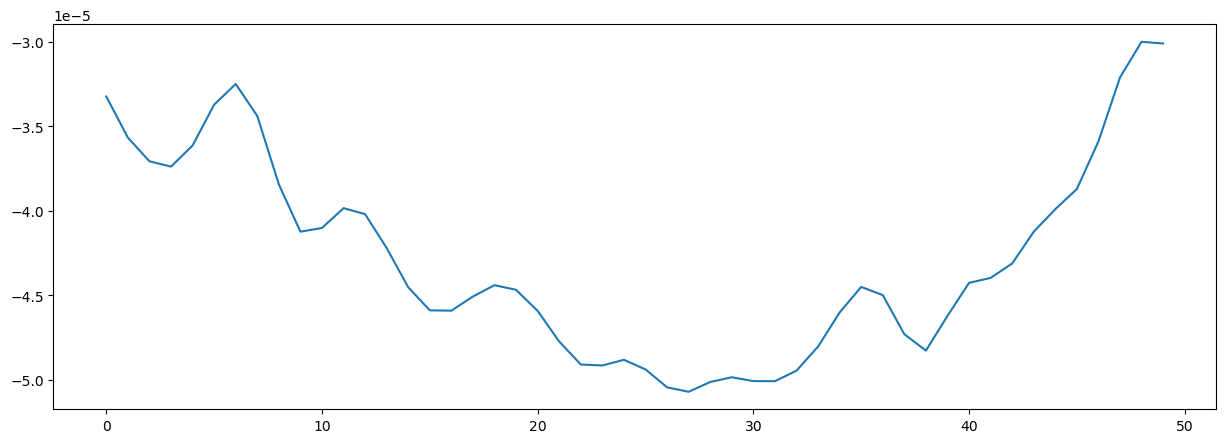

In [18]:
channel = 'Oz'
start_time = 1.0
stop_time = 1.1
fig,ax =plt.subplots(figsize=[15,5])
ax.plot(raw.get_data(picks=channel,tmin=start_time,tmax=stop_time).T)
plt.show()


plotting Oz channel data from 1.0s to 1.1s against time ( and not samples as above)

Text(0, 0.5, 'Voltage(muv)')

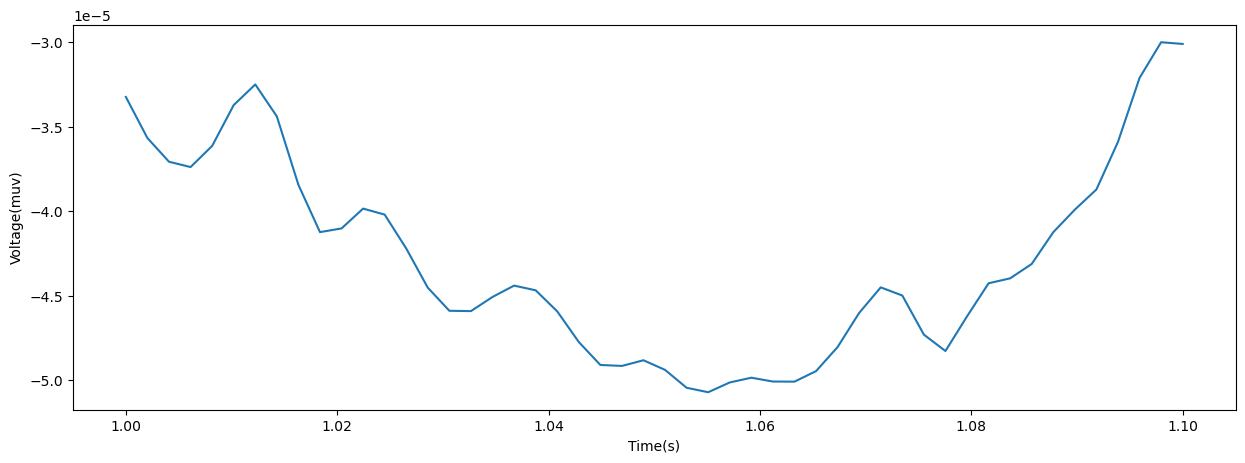

In [21]:
channel='Oz'
start_time=1.0
stop_time=1.1

data = raw.get_data(picks=channel,tmin=start_time,tmax=stop_time).T

#get time values
timevals = np.linspace(start_time,stop_time,num=data.shape[0])

fig,axs = plt.subplots(figsize=[15,5])
axs.plot(timevals,data)

plt.xlabel('Time(s)')
plt.ylabel('Voltage(muv)')
